<a href="https://colab.research.google.com/github/A01793509/Equipo_44/blob/main/Avance1_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

---
##👣**Obtener Datos**: Cargamos el archivo CSV con la información del consumo del casino desde enero del 2021 hasta marzo del 2024.
---

In [42]:
dfCasinoConsumo = pd.read_csv("DatosConsumoCasino.csv",sep=";")
dfCasinoConsumo.head()
dfCasinoConsumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884615 entries, 0 to 884614
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Consecutivo             884615 non-null  int64  
 1   IdProducto              836829 non-null  float64
 2   cod lector              884615 non-null  int64  
 3   Cod comedor             884615 non-null  int64  
 4   Identificacion persona  884615 non-null  int64  
 5   Fecha Consumo           884615 non-null  object 
 6   Detalle                 884615 non-null  object 
 7   Nro empleados           884615 non-null  int64  
 8   Tipo Empleado           884615 non-null  object 
 9   Nivel                   884615 non-null  object 
 10  Porcentaje apoyo        884615 non-null  int64  
 11  Invitado                884615 non-null  int64  
 12  Ing x planta            884615 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 87.7+ MB


In [34]:
print("**********************************************")
print(f"Se encontraron {len(dfCasinoConsumo):,.2f} registros:")
print("**********************************************")

**********************************************
Se encontraron 884,615.00 registros:
**********************************************


---
###☝ Antes de iniciar con la limpieza, validamos la relevancia de cada columna para el modelo, clasificándola de acuerdo al tipo de dato y decidiendo la acción que realizaremos con estas en el dataframe. A continuación mostramos el análisis preliminar que hicimos para nuestros datos:
---


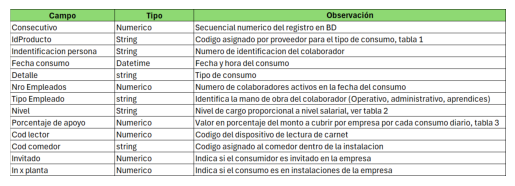

In [ ]:
img = mpimg.imread('DiccionarioDatos.png')
plt.imshow(img)
plt.axis('off')
plt.show()

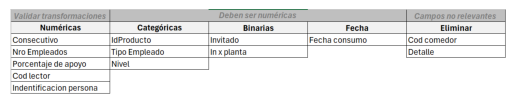

In [ ]:
img = mpimg.imread('AjusteDatos.png')
plt.imshow(img)
plt.axis('off')
plt.show()

---
##👣**Análisis exploratorio de datos:** Realizaremos análisis de las columnas existentes y validación de datos perdidos contestando las siguientes preguntas:
- ¿Hay valores faltantes en el conjunto de datos?
- ¿Se pueden identificar patrones de ausencia?
- ¿Cuáles son las estadísticas resumidas del conjunto de datos?
- ¿Hay valores atípicos en el conjunto de datos?
- ¿Cuál es la cardinalidad de las variables categóricas?
- ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
- ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
- ¿Hay correlación entre las variables dependientes e independientes?
- ¿Cómo se distribuyen los datos en función de diferentes categorías?
- ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
- ¿Hay desequilibrio en las clases de la variable objetivo?
---

---
<center> 🤔¿Hay valores faltantes en el conjunto de datos?</center>

---

In [35]:
#Verificamos si existen valores faltantes en nuestro conjunto
print("¿Hay valores faltantes en el conjunto de datos?")
if (dfCasinoConsumo.isna().values.any())==True:
  print("Sí")
else:
  print("No")

¿Hay valores faltantes en el conjunto de datos?
Sí


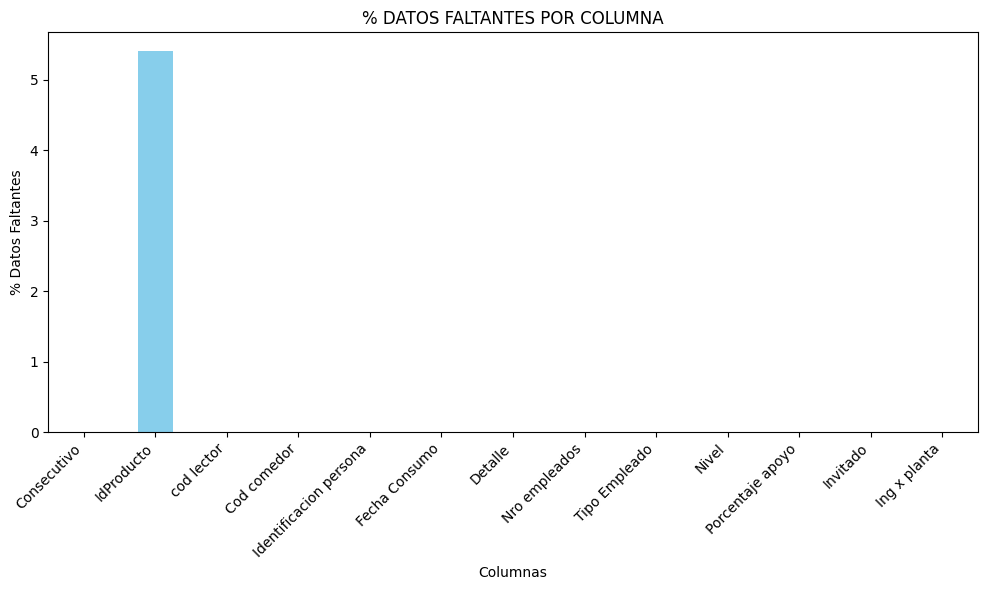

In [43]:
#Graficamos el porcentaje de datos faltantes por cada columna del conjunto
columnas_valor_faltante = dfCasinoConsumo.isnull().mean() * 100

plt.figure(figsize=(10, 6))
columnas_valor_faltante.plot(kind='bar', color='skyblue')
plt.title('% DATOS FALTANTES POR COLUMNA')
plt.xlabel('Columnas')
plt.ylabel('% Datos Faltantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
<center> 🤔¿Se pueden identificar patrones de ausencia?</center>

---

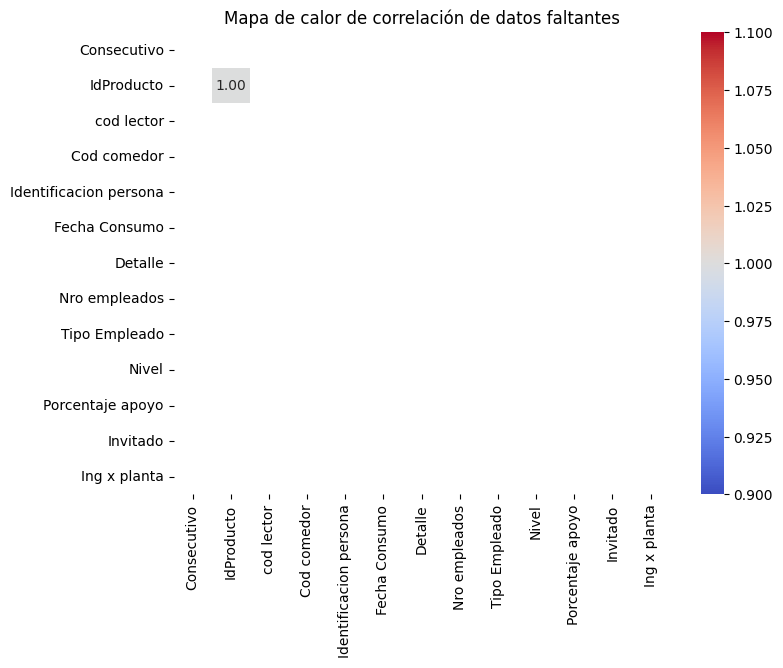

In [44]:
#A continuación, validamos si existe algún patrón de ausencia en los datos

#Generamos la matriz de correlación de datos faltantes en el conjunto
Correlacion_Faltantes = dfCasinoConsumo.isnull().corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(Correlacion_Faltantes, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Mapa de calor de correlación de datos faltantes')
plt.show()

---
#####🔎 Observamos que la única columna con datos faltantes es "**IdProducto**" presentando aproxidamente un **5%** de datos perdidos, por lo cual, concluímos que no es relevante para la integridad de la información. Adicionalmente, no encontramos patrones de ausencia al intentar correlacionar los datos faltantes con otras columnas. Por otra parte, al realizar un análisis más profundo a la información, encontramos que el campo "IdProducto" es una codificación que cada proveedor le asocia al tipo de consumo, valor que se categoriza en el campo "**Detalle**". En ese orden de ideas, podríamos eliminar la columna "IdProducto" para trabajar con la columna "Detalle".
---

---
<center> 🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>

---

In [52]:
#Seleccionamos solo las columnas numéricas de nuestro conjunto de datos
columnas_numericas = dfCasinoConsumo.select_dtypes(include='number')

#Ejecutamos el resumen estadístico para las columnas numéricas seleccionadas
columnas_numericas.describe()

,Identificacion persona,Nro empleados,Porcentaje apoyo,Invitado,Ing x planta
count,884615.000000,884615.000000,884615.000000,884615.0,884615.0
mean,101249.758539,3871.545797,61.330398,0.0,1.0
std,1039.239901,174.444601,40.545332,0.0,0.0
min,100001.000000,3410.000000,0.000000,0.0,1.0
25%,100410.000000,3820.000000,0.000000,0.0,1.0
50%,100905.000000,3875.000000,90.000000,0.0,1.0
75%,101953.000000,3968.000000,90.000000,0.0,1.0
max,104417.000000,4204.000000,100.000000,0.0,1.0


---
#####☝ A continuación vamos a obtener los valores no numéricos para aquellas columnas que según el diccionario deberían ser numéricas, tal como se identificó en el diccionario de datos mostrado al comienzo, una vez identificados estos valores no numéricos realizaremos su reemplazo antes de proceder con el cambio del tipo de dato en las columnas categóricas.
---

In [47]:
#Creamos el dataframe "dfnum" solo con las columnas numéricas del conjunto de datos original.
ColumnasNumericas=['Identificacion persona', 'Nro empleados', 'Porcentaje apoyo', 'Invitado', 'Ing x planta']
dfnum = dfCasinoConsumo[ColumnasNumericas]
#Creamos una lista para almacenar todos los valores no numéricos que encontramos en las columnas numéricas
list_nn = list()
for col in range(len(dfnum)):
  for fil in dfnum.iloc[col]:
    tem=str(fil)
    if (tem.isnumeric()==False):
      #Asignamos el valor no numérico encontrado a la lista.
      list_nn.append(fil)

#Convertimos todos los valores de la lista a 'str'
list_nn_final=list(map(str,list_nn))
#Ordenamos la lista en forma descendente para obtener aquellos valores con caracteres no numéricos
list_nn_final.sort(reverse=True)
if(len(list_nn_final)>0):
  print("********************************************************************************************************")
  print("Las siguientes son ocurrencias por valor no numérico encontradas en columnas que deberían ser numéricas:")
  print("********************************************************************************************************")
  pd.DataFrame(list_nn_final).sort_values([0]).value_counts().head(15)
else:
  print("********************************************************************************************************")
  print("Todas las columnas numéricas poseen valores con el tipo de dato correcto.")
  print("********************************************************************************************************")


********************************************************************************************************
Todas las columnas numéricas poseen valores con el tipo de dato correcto.
********************************************************************************************************


In [ ]:
dfCasinoConsumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884615 entries, 0 to 884614
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Identificacion persona  884615 non-null  int64 
 1   Fecha Consumo           884615 non-null  object
 2   Detalle                 884615 non-null  object
 3   Nro empleados           884615 non-null  int64 
 4   Tipo Empleado           884615 non-null  object
 5   Nivel                   884615 non-null  object
 6   Porcentaje apoyo        884615 non-null  int64 
 7   Invitado                884615 non-null  int64 
 8   Ing x planta            884615 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 60.7+ MB


---
#####☝ A continuación verificamos las columnas tipo "object", comenzando con la "**Fecha Consumo**", la idea es obtener los valores que no tengan formato fecha, una vez identificados estos valores inconsistentes procederemos a su estandarización.
---

In [49]:
#Convertimos la columna 'Fecha Consumo' a tipo datetime
dfCasinoConsumo['Fecha Consumo'] = pd.to_datetime(dfCasinoConsumo['Fecha Consumo'], format='%Y-%m-%d', errors='coerce')

#Obtenemos los valores que no se pudieron convertir a tipo datetime
valores_inconsistentes_datetime = dfCasinoConsumo[dfCasinoConsumo['Fecha Consumo'].isnull()]['Fecha Consumo']

# Verificar si todas las conversiones fueron exitosas
if dfCasinoConsumo['Fecha Consumo'].notnull().all():
  print("***********************************************************************")
  print("La columna 'Fecha Consumo' posee valores con el tipo de dato correcto.")
  print("***********************************************************************")
else:
  porc_inconsist_fecha = round((len(valores_inconsistentes_datetime)/len(dfCasinoConsumo))*100,2)
  print("****************************************************************************************************")
  print(f"La columna 'Fecha Consumo' contiene un %{porc_inconsist_fecha} de valores que no son de tipo fecha:")
  print(valores_inconsistentes_datetime)
  print("****************************************************************************************************")

****************************************************************************************************
La columna 'Fecha Consumo' contiene un %28.75 de valores que no son de tipo fecha:
502984   NaT
502985   NaT
502986   NaT
502987   NaT
502988   NaT
          ..
757347   NaT
757348   NaT
757349   NaT
757350   NaT
757351   NaT
Name: Fecha Consumo, Length: 254368, dtype: datetime64[ns]
****************************************************************************************************


---
#####🔎 Observamos que el **28.75%** (254,368) de los registros para el campo '**Fecha Consumo**' no presentan el tipo correcto, a continuación, realizaremos el ajuste de los datos inconsistentes.
---